In [1]:
from dask.distributed import Client, progress
import dask

In [2]:
from dask.distributed import Client, progress
dask.config.set(temporary_directory='/tmp/snesbitt/dask-worker/')

In [3]:
client = Client()  # set up local cluster on your laptop
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:64699,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:64710,Total threads: 3
Dashboard: http://127.0.0.1:64716/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:64702,


In [4]:
import xarray as xr
import pandas as pd
import numpy as np

In [8]:
base_url = 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/'
base_url2 = '/e5.moda.an.sfc.128_167_2t.ll025sc.'
base_url3 = '.nc'

# period of interest
pr = pd.date_range(start='1979-01',end='2022-12', freq='AS')

file_list=[]
for dt in pr:
    # get recent year and month
    year = dt.strftime('%Y')
    month = dt.strftime('%Y%m%d%H')
    month2 = (dt + pd.DateOffset(months=11)).strftime('%Y%m%d%H')

    # build complete file name
    single_file=(base_url+year+base_url2+month+'_'+month2+base_url3)
    file_list.append(single_file)

/var/folders/hl/905j06p96s1bqggj89x1kg9r0000gq/T/ipykernel_33742/2796436042.py:6: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pr = pd.date_range(start='1979-01',end='2022-12', freq='AS')


In [9]:
file_list

['https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/1979/e5.moda.an.sfc.128_167_2t.ll025sc.1979010100_1979120100.nc',
 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/1980/e5.moda.an.sfc.128_167_2t.ll025sc.1980010100_1980120100.nc',
 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/1981/e5.moda.an.sfc.128_167_2t.ll025sc.1981010100_1981120100.nc',
 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/1982/e5.moda.an.sfc.128_167_2t.ll025sc.1982010100_1982120100.nc',
 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/1983/e5.moda.an.sfc.128_167_2t.ll025sc.1983010100_1983120100.nc',
 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/1984/e5.moda.an.sfc.128_167_2t.ll025sc.1984010100_1984120100.nc',
 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/1985/e5.moda.an.sfc.128_167_2t.ll025sc.1985010100_1

In [14]:
ds = xr.open_mfdataset(file_list, parallel=True,chunks={'time': '50MB'})

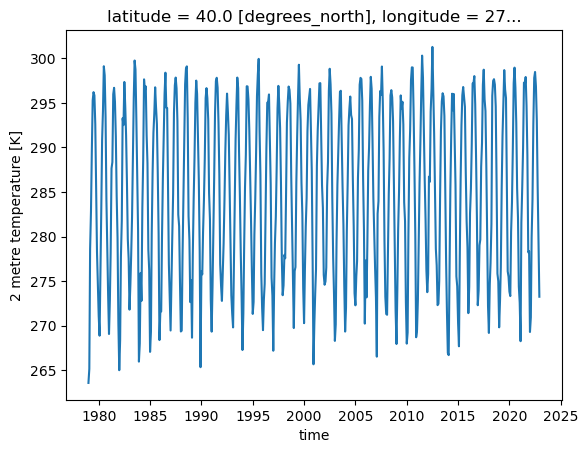

In [15]:
ds['VAR_2T'].sel(latitude=40., longitude=360-88., method='nearest').plot()

In [ ]:
client.close()